In [1]:
from pathlib import Path

import pandas as pd

import src.visualizations.raw_data as visualizations
import src.utils.misc as misc

In [2]:
parent_dir = Path('/Volumes/SSDExtreme/Work/Data/Crick')    # Change this to the directory where you store the data
data_dir_enose = parent_dir.joinpath('Dataset-FastMachineOlfaction/Enose')
data_dir_pid = parent_dir.joinpath('Dataset-FastMachineOlfaction/PID/Full')
assert data_dir_enose.exists(), f'{data_dir_enose} does not exist'
assert data_dir_pid.exists(), f'{data_dir_pid} does not exist'

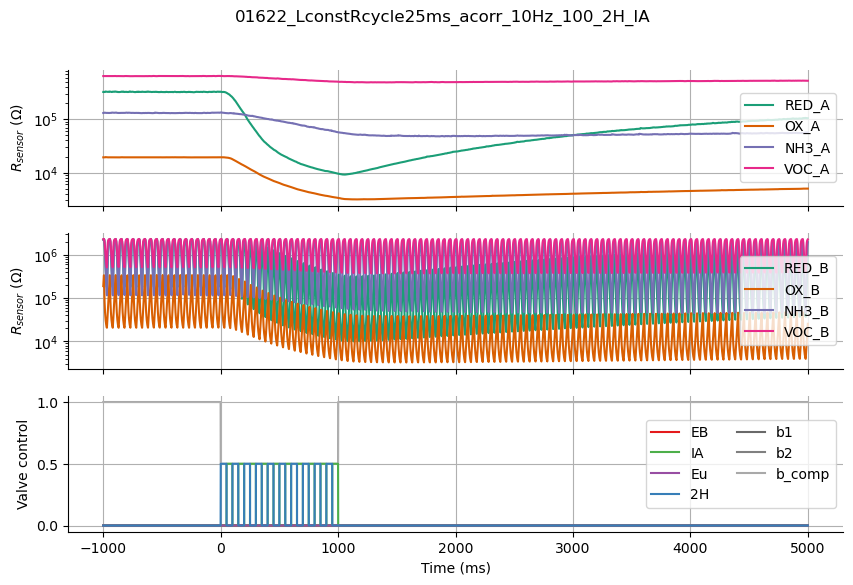

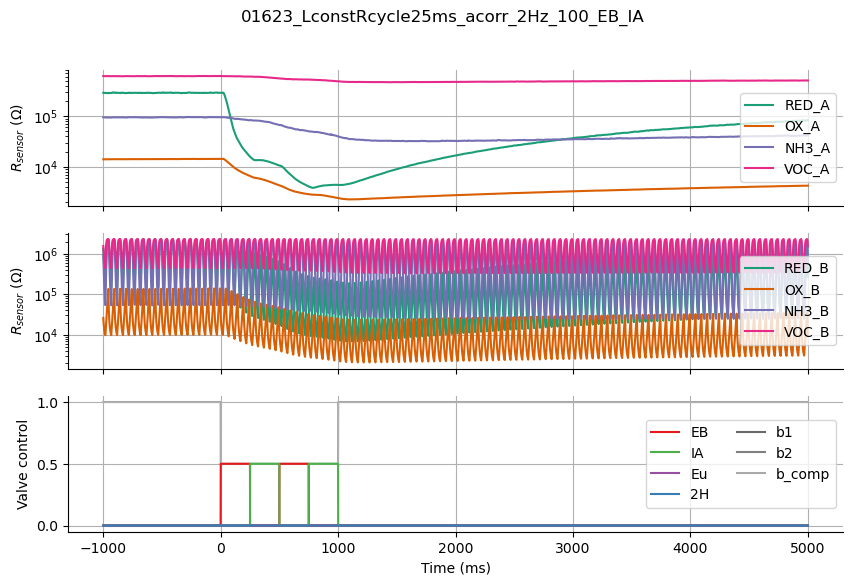

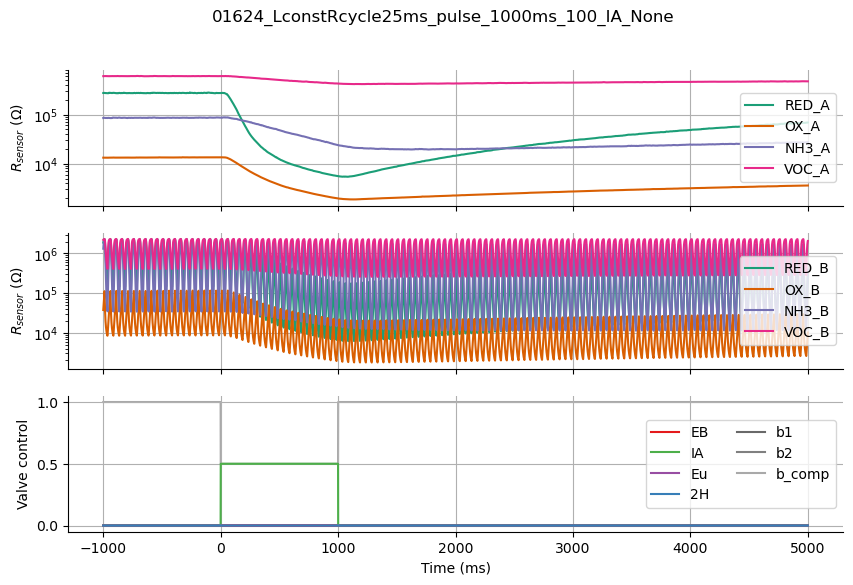

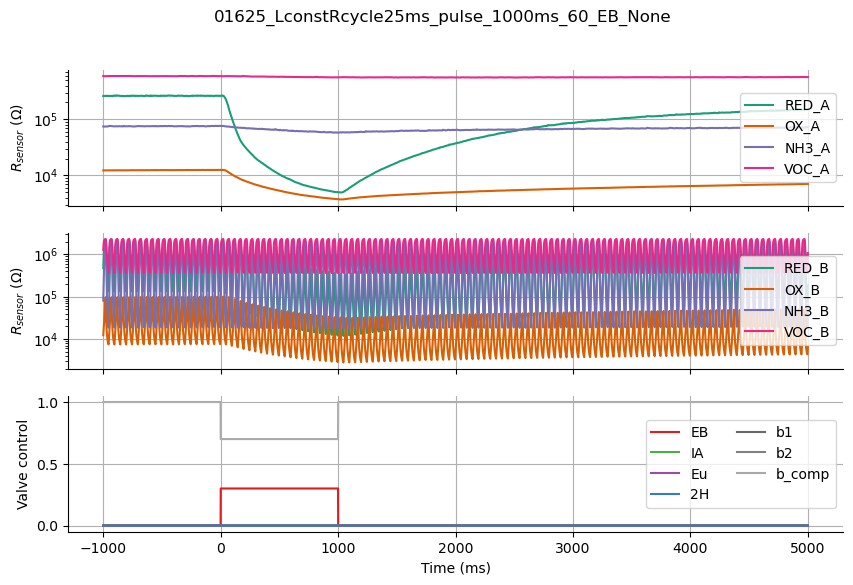

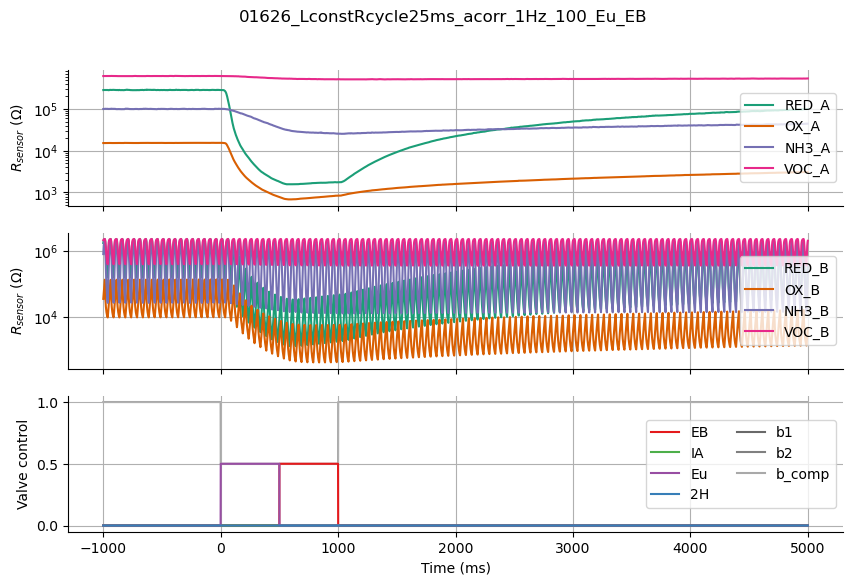

In [3]:
# Load and plot E-nose experiments

# Load index
index_file_enose = data_dir_enose.joinpath("index.csv")
index_df_enose = pd.read_csv(index_file_enose)

# Plot some trials
cmax=5
c=0
# Iterate over index
for i, trial in index_df_enose.iterrows():
    # Specify trial conditions
    if trial['condition'] != 'LconstRcycle25ms':
        continue
    if trial['kind'] == 'plume':
        continue

    # Load trial data as dataframe
    trial_df = misc.get_trial_df(trial, data_dir_enose, ms_start=-1000, ms_stop=5000)
    trial_id = trial['trial_id']

    # Plot trial data
    visualizations.plot_enose_trial_df(trial_df, trial_id)

    # Stop after cmax trials
    c+=1
    if c==cmax:
        break

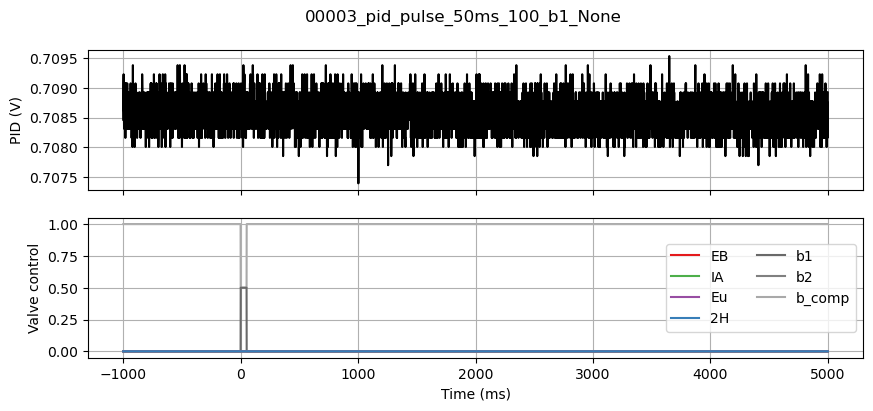

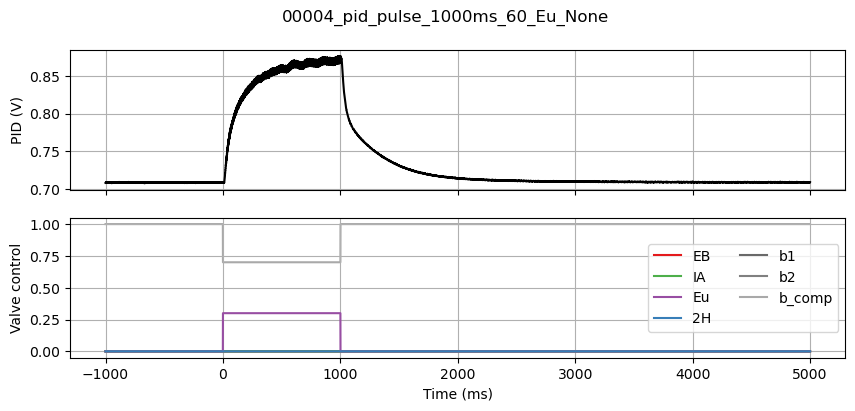

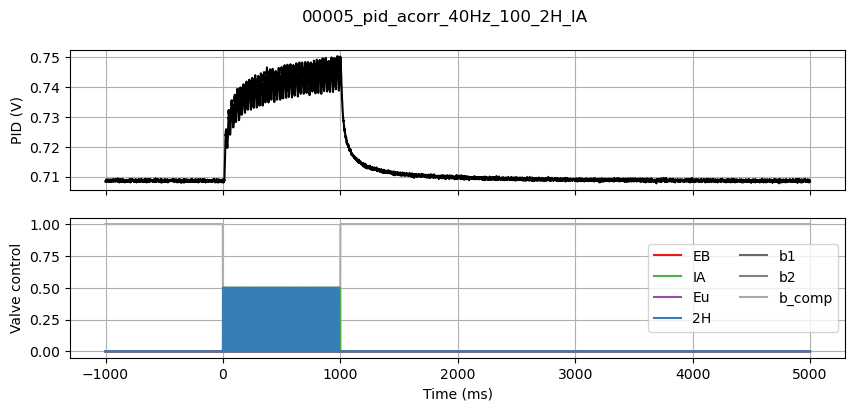

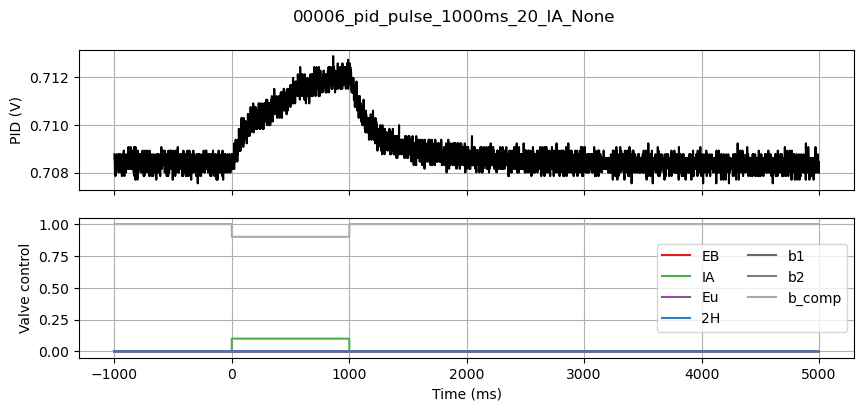

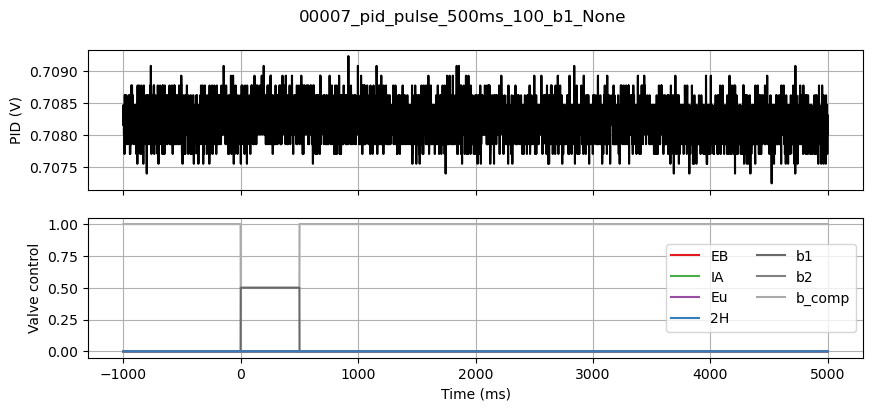

In [4]:
# Load and plot PID experiments

# Load index
index_file_pid_new = data_dir_pid.joinpath("index.csv")
index_df_pid_new = pd.read_csv(index_file_pid_new)

# Plot some trials
cmax=5
c=0
# Iterate over index
for i, trial in index_df_pid_new.iterrows():
    # Specify trial conditions
    if trial['kind'] == 'plume':
        continue
    # Load trial data as dataframe
    trial_df = misc.get_trial_df(trial, data_dir_pid, ms_start=-1000, ms_stop=5000)
    visualizations.plot_pid_trial_df(trial_df, trial['trial_id'])
    c+=1
    if c==cmax:
        break
